In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.tsv',sep='\t') #let's read the training dataset

In [4]:
data.head() #check the head of the data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [6]:
data['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [8]:
data=data.drop(['PhraseId','SentenceId'],axis=1)
data.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 2 columns):
Phrase       156060 non-null object
Sentiment    156060 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [10]:
def get_polarity(data):
        # set sentiment
        if data['Sentiment'] == 0:
            return 'negative'
        elif data['Sentiment'] == 1:
            return 'somewhat negative'
        elif data['Sentiment']==2:
            return 'neutral'
        elif data['Sentiment']==3:
            return 'somewhat positive'
        else:
            return 'positive'

In [11]:
data['Polarity'] = data.apply(get_polarity,axis=1)

In [12]:
data.head()

,Phrase,Sentiment,Polarity
0,A series of escapades demonstrating the adage ...,1,somewhat negative
1,A series of escapades demonstrating the adage ...,2,neutral
2,A series,2,neutral
3,A,2,neutral
4,series,2,neutral


In [13]:
data.isna().sum()

Phrase       0
Sentiment    0
Polarity     0
dtype: int64

In [14]:
data.isnull().sum()

Phrase       0
Sentiment    0
Polarity     0
dtype: int64

neutral              79582
somewhat positive    32927
somewhat negative    27273
positive              9206
negative              7072
Name: Polarity, dtype: int64


Text(0.5,0,'Sentiment expressed in Reviews')

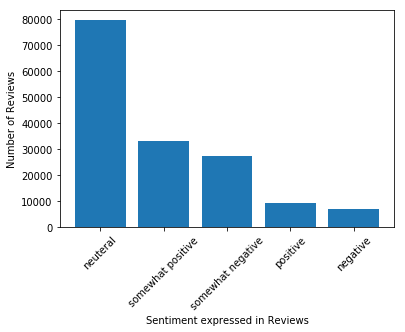

In [15]:
Index = [1,2,3,4,5]
print(data.Polarity.value_counts())
plt.bar(Index,data.Polarity.value_counts())
plt.xticks(Index,['neuteral','somewhat positive','somewhat negative','positive','negative'],rotation=45)
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

In [16]:
data['Length'] = data['Phrase'].apply(lambda x: len(str(x).split(' ')))

In [17]:
data.head(10)

,Phrase,Sentiment,Polarity,Length
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37
1,A series of escapades demonstrating the adage ...,2,neutral,14
2,A series,2,neutral,2
3,A,2,neutral,1
4,series,2,neutral,1
5,of escapades demonstrating the adage that what...,2,neutral,12
6,of,2,neutral,1
7,escapades demonstrating the adage that what is...,2,neutral,11
8,escapades,2,neutral,1
9,demonstrating the adage that what is good for ...,2,neutral,10


In [18]:
data['Length'].unique()

array([37, 14,  2,  1, 12, 11, 10,  3,  7,  6,  5,  4, 23, 22, 20, 19, 18,
       15,  9,  8, 21, 26, 25, 16, 13, 17, 30, 28, 27, 24, 41, 40, 36, 29,
       31, 32, 34, 33, 42, 39, 38, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52], dtype=int64)

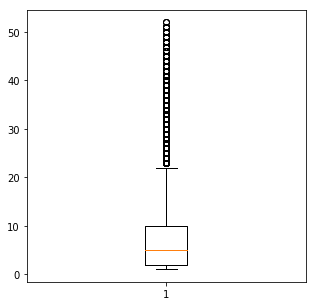

In [19]:
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(data['Length'])
plt.show()

In [20]:
data[data['Length']>25]['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

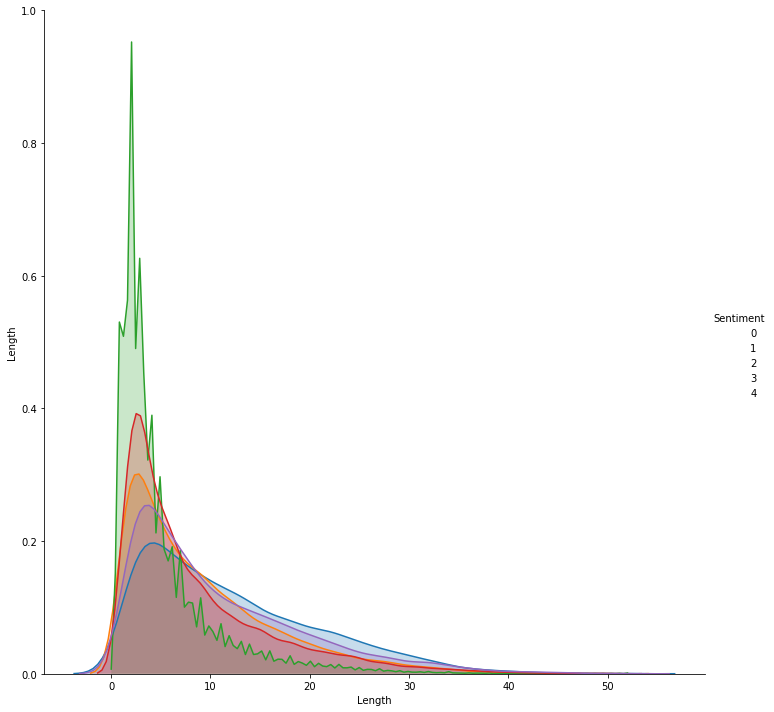

In [21]:
import seaborn as sns
sns.pairplot(data,hue='Sentiment',vars=['Length'],size=10)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(data.Phrase)

CountVectorizer(min_df=0.0, ngram_range=(1, 2))

In [23]:
len(cvector.get_feature_names())

94644

In [24]:
matrix = cvector.transform(data.Phrase)
words = matrix.sum(axis=0)
words_freq = [(word, words[0, idx]) for word, idx in cvector.vocabulary_.items()]
tf = pd.DataFrame(list(sorted(words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','frequency'])

In [25]:
tf.head(10)

,Terms,frequency
0,the,51633
1,of,32702
2,and,32177
3,to,22761
4,in,13997
5,is,13476
6,that,12338
7,it,11734
8,as,8651
9,with,7750


Text(0.5,1,'Top 50 tokens in negative movie reviews')

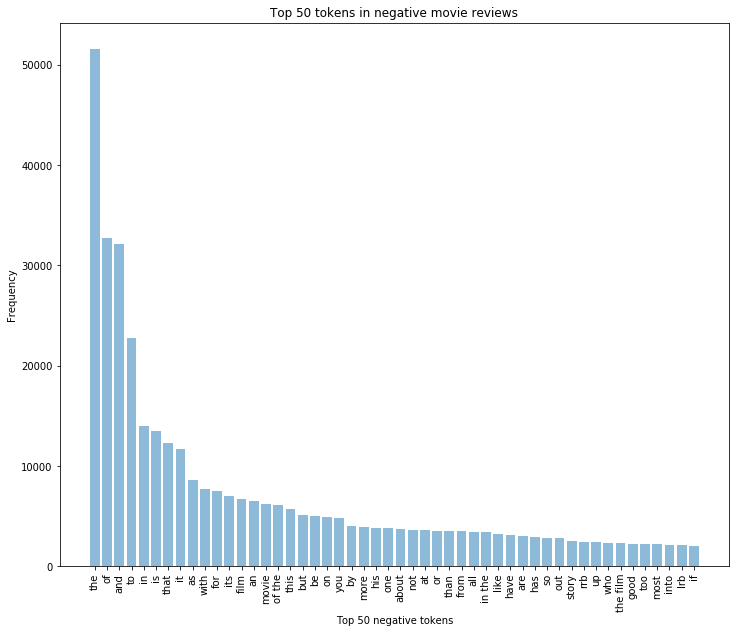

In [26]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, tf['frequency'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, tf['Terms'][:50],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')

In [27]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [28]:
def review_to_words(review, string = True, remove_stopwords=True):
    # Remove HTML
    review_text = BeautifulSoup(review).get_text()
    # Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    # Convert words to lower case and split them
    words = review_text.lower().split()
    # Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    if string:
        return " ".join(words)
    else:
        return words

In [ ]:
data['Refined_Phrase']=data['Phrase'].apply(lambda x: review_to_words(x))

In [227]:
data.head()

,Phrase,Sentiment,Polarity,Length,New
0,A series of escapades demonstrating the adage ...,1,somewhat negative,37,series escapades demonstrating adage good goos...
1,A series of escapades demonstrating the adage ...,2,neutral,14,series escapades demonstrating adage good goose
2,A series,2,neutral,2,series
3,A,2,neutral,1,
4,series,2,neutral,1,series


In [228]:
data[data['Refined_Phrase'].str.len() == 0].head()

,Phrase,Sentiment,Polarity,Length,New
3,A,2,neutral,1,
6,of,2,neutral,1,
13,the,2,neutral,1,
16,that,2,neutral,1,
18,what,2,neutral,1,


In [233]:
data=data.drop('Phrase',axis=1)
data.head()

,Sentiment,Polarity,Length,New
0,1,somewhat negative,37,series escapades demonstrating adage good goos...
1,2,neutral,14,series escapades demonstrating adage good goose
2,2,neutral,2,series
3,2,neutral,1,
4,2,neutral,1,series


In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
Sentiment    156060 non-null int64
Polarity     156060 non-null object
Length       156060 non-null int64
New          156060 non-null object
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [239]:
matrix2 = cvector.transform(data.Refined_Phrase)
words2 = matrix2.sum(axis=0)
words_freq2 = [(word, words2[0, idx]) for word, idx in cvector.vocabulary_.items()]
tf2 = pd.DataFrame(list(sorted(words_freq2, key = lambda x: x[1], reverse=True)),columns=['Terms','frequency'])

In [240]:
tf2.head(10)

,Terms,frequency
0,film,6733
1,movie,6241
2,one,3784
3,like,3190
4,story,2539
5,rrb,2438
6,good,2261
7,lrb,2098
8,time,1919
9,characters,1882


Text(0.5,1,'Top 50 tokens in negative movie reviews')

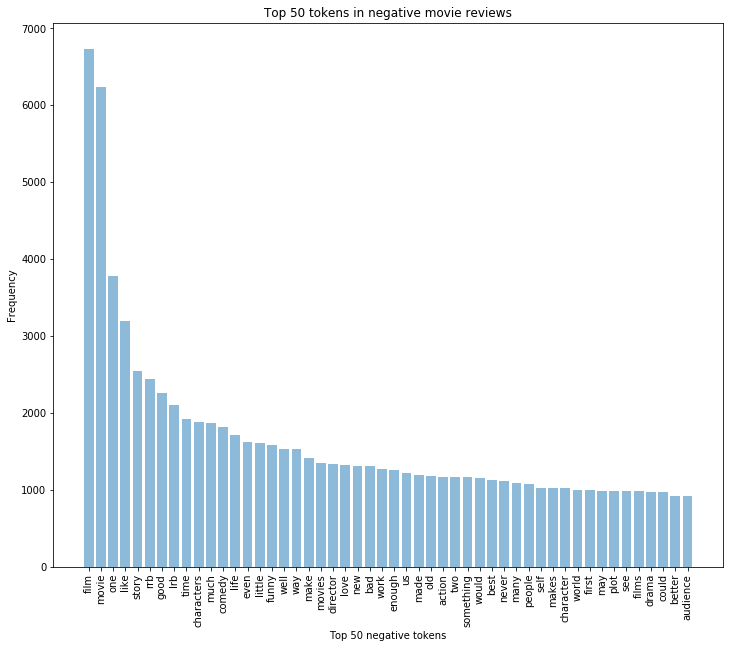

In [241]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, tf2['frequency'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, tf2['Terms'][:50],rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative movie reviews')